In [12]:
# Srikanth Schelbert Homework1

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import math

import functools

In [13]:
centerpoint = (0.3, 0.4)


def f(x, point):
    """Function for ring"""
    return math.exp(-100 * ((math.dist(x, point) - 0.2)**2))


# Generate grid points
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)


# @functools.lru_cache(maxsize=None)
def compute_z(X, Y, centerpoint):
    """Compute function values Z"""
    Z = np.zeros_like(X)  # Initialize array for function values
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = f([X[i, j], Y[i, j]], centerpoint)
    return Z


Sampled locs: [[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]]
Sensor reads: [0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


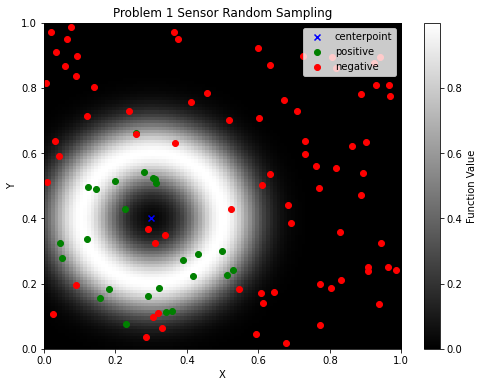

In [14]:
### PART 1 ###
# Sample 100 random locations
np.random.seed(42)  # for reproducibility
num_samples = 100
sampled_locations = np.random.rand(num_samples, 2)

# Create the plot
plt.figure(figsize=(8, 6))
# Plot sampled locations
plt.scatter(centerpoint[0], centerpoint[1], marker='x',
            color='blue', label='centerpoint')

# results of sensor (0 neg, 1 pos)
results = []
for loc in sampled_locations:
    x, y = loc
    if np.random.rand() < f([x, y], centerpoint):
        plt.scatter(x, y, color='green')
        results.append(1)
    else:
        plt.scatter(x, y, color='red')
        results.append(0)

print(f"Sampled locs: {sampled_locations[:5]}")
print(f"Sensor reads: {results[:50]}")
# Create dummy scatter plots for legend
plt.scatter([], [], color='green', label='positive')
plt.scatter([], [], color='red', label='negative')

Z_mat = compute_z(X, Y, centerpoint)


# Add legend
plt.legend(loc='upper right')
plt.imshow(Z_mat, extent=[0, 1, 0, 1], cmap='gray',
           origin='lower', aspect='auto')
plt.colorbar(label='Function Value')
plt.title('Problem 1 Sensor Random Sampling')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

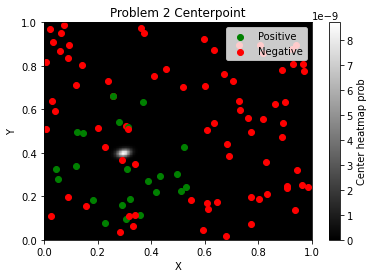

In [15]:
### PART 2 ###
def prob_z_given_x(x_i, s_i, z_i):
    if z_i == 1:
        return f(x_i, s_i)
    else:
        return 1 - f(x_i, s_i)
    
# @functools.lru_cache(maxsize=None)
def compute_L(X, Y, samples, results_vec):
    """Compute function values Z"""
    L = np.ones_like(X)  # Initialize array for function values
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            for k in range(len(results_vec)):
                L[i, j] *= prob_z_given_x(samples[k], [X[i, j], Y[i, j]], results_vec[k])
    return L

# results of sensor (0 neg, 1 pos)
results = []
for loc in sampled_locations:
    x, y = loc
    if np.random.rand() < f([x, y], centerpoint):
        plt.scatter(x, y, color='green')
        results.append(1)
    else:
        plt.scatter(x, y, color='red')
        results.append(0)

# Create dummy scatter plots for legend
plt.scatter([], [], color='green', label='Positive')
plt.scatter([], [], color='red', label='Negative')

L_mat = compute_L(X, Y, sampled_locations, results)
# Add legend
plt.legend(loc='upper right')
plt.imshow(L_mat, extent=[0, 1, 0, 1], cmap='gray',
           origin='lower', aspect='auto')
plt.colorbar(label='Center heatmap prob')
plt.title('Problem 2 Centerpoint')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

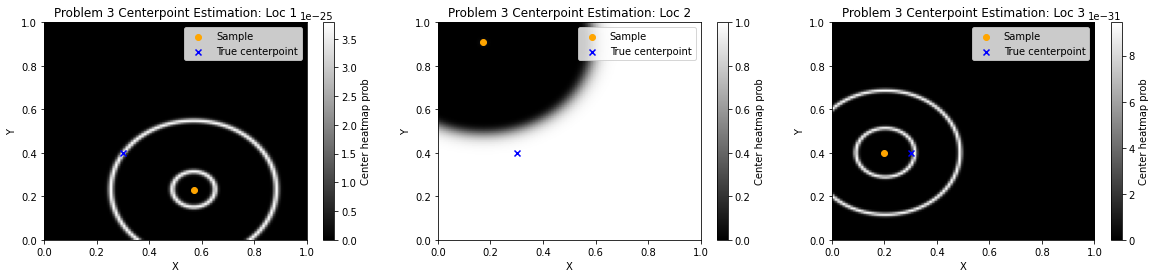

In [16]:
### PART 3 ###
    
# @functools.lru_cache(maxsize=None)
def compute_L_3(X, Y, sample, results_vec):
    """Compute function values Z"""
    L = np.ones_like(X)  # Initialize array for function values
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            for k in range(len(results_vec)):
                L[i, j] *= prob_z_given_x(sample, [X[i, j], Y[i, j]], results_vec[k])
    return L

# results = []
not_so_random_samples = [(0.57, 0.23), (0.17, 0.91), (0.2, 0.4)]
def generate_results(sample):
    results = []
    for _ in range(100):
        x, y = sample[0], sample[1]
        if np.random.rand() < f([x, y], centerpoint):
            results.append(1)
        else:
            results.append(0)
    return results

# Define your plotting function
def plot_iteration(sample, results, subplot_index):
    plt.subplot(1, 3, subplot_index)
    plt.scatter(sample[0], sample[1], color='orange', label='Sample')
    plt.scatter(centerpoint[0], centerpoint[1], marker='x',
                color='blue', label='True centerpoint')

    L_mat_3 = compute_L_3(X, Y, sample, results)

    # Add legend
    plt.legend(loc='upper right')
    plt.imshow(L_mat_3, extent=[0, 1, 0, 1], cmap='gray',
               origin='lower', aspect='auto')
    plt.colorbar(label='Center heatmap prob')
    plt.title(f'Problem 3 Centerpoint Estimation: Loc {subplot_index}')
    plt.xlabel('X')
    plt.ylabel('Y')

plt.figure(figsize=(20, 4))  # Adjust figure size as needed
# Iteratively generate and plot results for different samples
for i in range(len(not_so_random_samples)):  # Change the range according to the desired number of iterations
    curr_sample = (not_so_random_samples[i][0], not_so_random_samples[i][1])
    results = generate_results(curr_sample)
    plot_iteration(curr_sample, results, subplot_index=i+1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

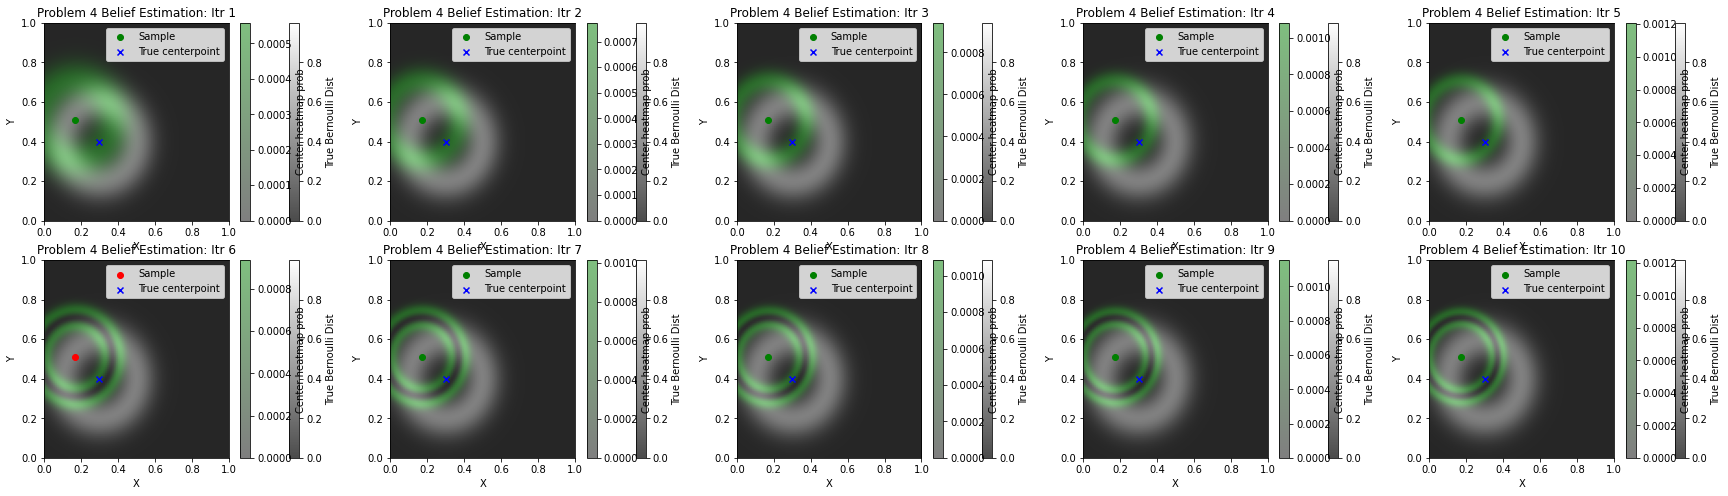

In [17]:
### PART 4 ###

# results = []
not_so_random_samples = [(0.57, 0.23), (0.17, 0.91), (0.2, 0.4)]

initial_prior = 1/10000
B = np.ones_like(X) * initial_prior  # Initialize array for prior belief

def generate_one_result(sample):
    x, y = sample[0], sample[1]
    if np.random.rand() < f([x, y], centerpoint):
        return 1
    else:
        return 0


def compute_prob_sum(X, Y, sample, result, belief):
    """Compute probability sum"""
    p_sum = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            p_sum += prob_z_given_x(sample, [X[i, j], Y[i, j]], result) * belief[i, j]
    return p_sum

# Belief update eqn
def prob_s_given_z(x_i, s_i, z_i, b_bar_i, p_sum):
    return (prob_z_given_x(x_i, s_i, z_i) * b_bar_i)/p_sum

def update_belief(x_i, z_i, b_bar, p_sum):
    """Update total belief matrix"""
    Belief = np.ones_like(b_bar)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Belief[i, j] = prob_s_given_z(x_i, [X[i, j], Y[i, j]], z_i, b_bar[i, j], p_sum)
    return Belief


# Define your plotting function
def plot_iteration_4(sample, belief, result, subplot_index):
    plt.subplot(2, 5, subplot_index)

    # Define custom colormap from black to green
    colors = [(0, 0, 0), (0, 0.5, 0)]  # black to dark green
    cmap_name = 'black_to_green'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

    # Add white sensor gradient
    plt.legend(loc='upper right')
    plt.imshow(Z_mat, extent=[0, 1, 0, 1], cmap='gray',
            origin='lower', aspect='auto', alpha=0.7)
    plt.colorbar(label='True Bernoulli Dist')

    if result == 1:
        plt.scatter(sample[0], sample[1], color='green', label='Sample')
    else:
        plt.scatter(sample[0], sample[1], color='red', label='Sample')
    plt.scatter(centerpoint[0], centerpoint[1], marker='x',
                color='blue', label='True centerpoint')

    # Add legend
    plt.legend(loc='upper right')
    plt.imshow(belief, extent=[0, 1, 0, 1], cmap=cm,
               origin='lower', aspect='auto', alpha=0.5)
    plt.colorbar(label='Center heatmap prob')
    plt.title(f'Problem 4 Belief Estimation: Itr {subplot_index}')
    plt.xlabel('X')
    plt.ylabel('Y')

plt.figure(figsize=(30, 8))  # Adjust figure size as needed
# Iteratively generate and plot results for different samples
for i in range(10):  # Change the range according to the desired number of iterations
    curr_sample = (0.17, 0.51)
    curr_result = generate_one_result(curr_sample)
    prob_sum = compute_prob_sum(X, Y, curr_sample, curr_result, B)
    B = update_belief(curr_sample, curr_result, B, prob_sum)
    plot_iteration_4(curr_sample, B, curr_result, subplot_index=i+1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1
1
1
1
1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1
1
1
1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1


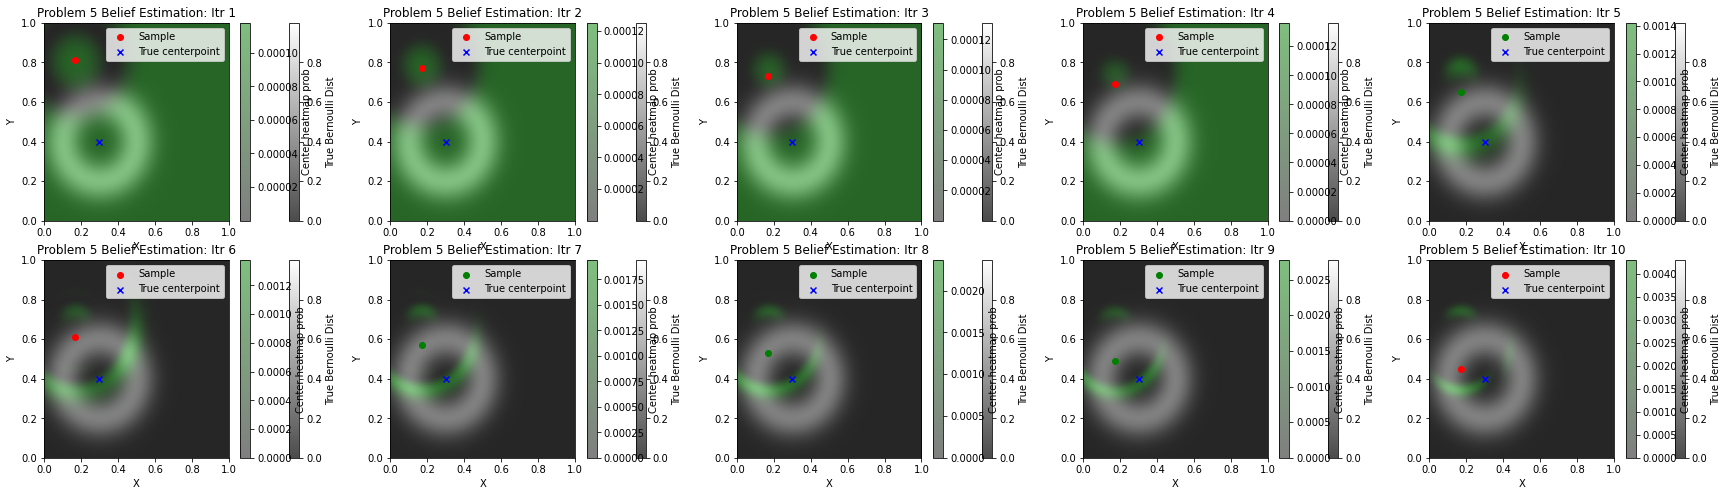

In [18]:
### PART 5 ###

B5 = np.ones_like(X) * initial_prior  # Initialize array for prior belief

def generate_one_result(sample):
    x, y = sample[0], sample[1]
    if np.random.rand() < f([x, y], centerpoint):
        return 1
    else:
        return 0

def compute_prob_sum(X, Y, sample, result, belief):
    """Compute probability sum"""
    p_sum = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            p_sum += prob_z_given_x(sample, [X[i, j], Y[i, j]], result) * belief[i, j]
    return p_sum

# Belief update eqn
def prob_s_given_z(x_i, s_i, z_i, b_bar_i, p_sum):
    return (prob_z_given_x(x_i, s_i, z_i) * b_bar_i)/p_sum

def update_belief(x_i, z_i, b_bar, p_sum):
    """Update total belief matrix"""
    Belief = np.ones_like(b_bar)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Belief[i, j] = prob_s_given_z(x_i, [X[i, j], Y[i, j]], z_i, b_bar[i, j], p_sum)
    return Belief


# Define your plotting function
def plot_iteration_4(sample, belief, result, subplot_index):
    plt.subplot(2, 5, subplot_index)

    # Define custom colormap from black to green
    colors = [(0, 0, 0), (0, 0.5, 0)]  # black to dark green
    cmap_name = 'black_to_green'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

    # Add white sensor gradient
    plt.legend(loc='upper right')
    plt.imshow(Z_mat, extent=[0, 1, 0, 1], cmap='gray',
            origin='lower', aspect='auto', alpha=0.7)
    plt.colorbar(label='True Bernoulli Dist')

    if result == 1:
        plt.scatter(sample[0], sample[1], color='green', label='Sample')
    else:
        plt.scatter(sample[0], sample[1], color='red', label='Sample')
    plt.scatter(centerpoint[0], centerpoint[1], marker='x',
                color='blue', label='True centerpoint')

    # Add legend
    plt.legend(loc='upper right')
    plt.imshow(belief, extent=[0, 1, 0, 1], cmap=cm,
               origin='lower', aspect='auto', alpha=0.5)
    plt.colorbar(label='Center heatmap prob')
    plt.title(f'Problem 5 Belief Estimation: Itr {subplot_index}')
    plt.xlabel('X')
    plt.ylabel('Y')

plt.figure(figsize=(30, 8))  # Adjust figure size as needed
# Iteratively generate and plot results for different samples
for i in range(10):  # Change the range according to the desired number of iterations
    curr_sample5 = (0.17, 0.81 - (i * 0.04))
    curr_result5 = generate_one_result(curr_sample5)
    print(curr_result)
    prob_sum5 = compute_prob_sum(X, Y, curr_sample5, curr_result5, B5)
    B5 = update_belief(curr_sample5, curr_result5, B5, prob_sum5)
    plot_iteration_4(curr_sample5, B5, curr_result5, subplot_index=i+1)
plt.show()